In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
# Dùng thư viện yfinance để tải dataset 
import yfinance as yf

start_date = '2019-01-01'
end_date = '2023-03-31'
symbol = 'BTC-USD' 

data = yf.download(symbol, start=start_date, end=end_date)
data.to_csv('/content/drive/MyDrive/Datasets/BTC-USD.csv')

[*********************100%***********************]  1 of 1 completed


In [78]:
# Xem data 
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824
...,...,...,...,...,...,...
2023-03-26,27495.523438,28178.144531,27445.046875,27994.330078,27994.330078,13878363192
2023-03-27,27994.068359,28037.925781,26606.689453,27139.888672,27139.888672,18188895178
2023-03-28,27132.888672,27460.718750,26677.818359,27268.130859,27268.130859,17783600385


In [79]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [80]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/drive/MyDrive/Datasets/BTC-USD.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets - 6-3-1
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [81]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [82]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [83]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[65590.11161289 65635.00603856 65679.90046422 65724.79488989
 65769.68931556 65814.58374123 65859.4781669  65904.37259257
 65949.26701824 65994.1614439  66039.05586957 66083.95029524
 66128.84472091 66173.73914658 66218.63357225 66263.52799792
 66308.42242358 66353.31684925 66398.21127492 66443.10570059
 66488.00012626 66532.89455193 66577.7889776  66622.68340326
 66667.57782893 66712.4722546  66757.36668027 66802.26110594
 66847.15553161 66892.04995728]


In [84]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)


Validation RMSE: 41596.13446816342
Testing RMSE: 21366.278160847836


Validation RMSE: 41596.13446816342
Testing RMSE: 21366.278160847836


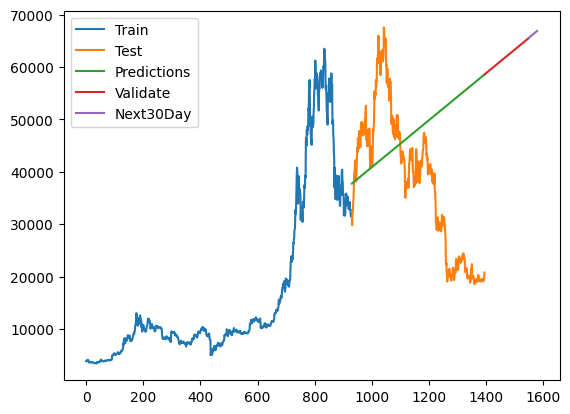

In [85]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [86]:
test_data.index

RangeIndex(start=930, stop=1395, step=1)

In [87]:
# import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
# mae = mean_absolute_error(y_test,y_pred)
# print('MAE:', mae) 
# mse = mean_squared_error(y_test,y_pred)
# print('MSE:', mse)
r_squared = r2_score(y_test, y_pred)
print("Test_R-squared: ", r_squared) 
r_squared = r2_score(y_val, y_pred_val)
print("Val_R-squared: ", r_squared) 
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print("Testing MAPE",test_mape)
val_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print("Validation MAPE",val_mape)

Test_R-squared:  -1.5689692560875357
Val_R-squared:  -130.78374984140095
Testing MAPE 0.6599375316897582
Validation MAPE 2.098875788481501
